<a href="https://colab.research.google.com/github/NLZT/Deep-Dive-Projects/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 3: Music Popularity Prediction 
The goal of this project is to develop a model that can determine which features are infulcing song popularity using a tree regression.



## Problem Definition

The purpose of this project is to predict **new song popularity** (*target*) based on data features (*variables*) collected for songs that have been on the top 200 Weekly Global charts of Spotify in 2020 and 2021.

This is a **supervised regression** problem.

**Goals**

* To minimize the cross-validated root mean squared error (RMSE) around 10.
* To determine the importance of the features in driving the regression result.
* To choose parameters that will avoid over-fitting in the result.

**Methodology**

The project will be done using tree-based regression techniques.

## Data Collection
*   Load Python Packages
*   Load the data contained in [Project_3_Spotify.csv](https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021) into a DataFrame
*   Create a back-up copy of the original data at the start of the runtime

In [ ]:
#mount drive to import files
from google.colab import drive
drive.mount('/drive')

MessageError: ignored

In [ ]:
#import python packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
from wordcloud import WordCloud
#------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from IPython.display import display
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
#import csv data set from google file path
p3 = '/drive/MyDrive/Project_3_Spotify.csv'
data = pd.read_csv(p3)

##Data Analysis & Cleaning

*   Get an idea of what is in the data.
*   Learn the shape and size of the data.
*   Get an idea for the iniditial stats
*   Look for any obvious items that need to be addressed during cleaning or otherwise. 

In [ ]:
pd.options.display.max_columns=100
data

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
data.shape

(1556, 23)

In [ ]:
data.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

This looks pretty good. No nulls, but there are a lot of objects. We know from looking at the dataframe that those varibles should be numerals not objects.

In [ ]:
#Start by making a copy that we can reset if we make any mistakes
data_clean=data.copy()

###Drop Irrelevant Data

* `Index` is redundant with the use of pandas.
* `Song Name` and `Song ID` are likely to be another set of indexes.
* `Highest Charting Position`, `Number of Times Charted`, `Week of Highest Charting`, `Streams`, and `Weeks Charted` are not useful predictors because we do not have this information until after the song is released.




In [ ]:
#Confirm index column is == DataFrame.index it has the same amount of rows as the dataframe
data_clean["Index"].value_counts()

1       1
1023    1
1045    1
1044    1
1043    1
       ..
516     1
515     1
514     1
513     1
1556    1
Name: Index, Length: 1556, dtype: int64

In [ ]:
#Droping the redundant index and the varible that are not useful for a predictive model because that data cannot be acquired until after the song's release.
data_clean.drop(["Index", "Highest Charting Position", "Number of Times Charted", "Week of Highest Charting", "Streams", "Weeks Charted"], axis=1, inplace=True)
data_clean

,Song Name,Artist,Artist Followers,Song ID,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Beggin',Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,STAY (with Justin Bieber),The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,good 4 u,Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,Bad Habits,Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,Havana (feat. Young Thug),Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


Now I will take a look at 'Song Name' and 'Song ID' to see if my assumptions about them are true and to get an idea of what we can do with them.

In [ ]:
data_clean["Song Name"].value_counts()

Beggin'                                                   1
Ignorantes                                                1
Creature (feat. Swae Lee)                                 1
44 BullDog                                                1
Aim For The Moon (feat. Quavo)                            1
                                                         ..
Electric Love                                             1
Star Shopping                                             1
Head Shoulders Knees & Toes (feat. Norma Jean Martine)    1
Se Te Nota (with Guaynaa)                                 1
Lover (Remix) [feat. Shawn Mendes]                        1
Name: Song Name, Length: 1556, dtype: int64

In [ ]:
data_clean["Song ID"].value_counts()

                          11
5uEYRdEIh9Bo4fpjDd4Na9     3
4S2uhQE8L9V6p7rj7SiauJ     2
35UUpTmrcFXNIVIN26ujXl     2
2YpeDb67231RjR0MgVLzsG     2
                          ..
5gEUDNQvoQjdjklrwPdGwD     1
0e7ipj03S05BNilyu5bRzt     1
696DnlkuDOXcMAnKlTgXXK     1
3GtnId3Cm1Xa6joCj08nzW     1
3i9UVldZOE0aD0JnyfAZZ0     1
Name: Song ID, Length: 1517, dtype: int64

Oddly enough there are duplications in song id. Lets see what is going on there.

In [ ]:
data_clean.loc[data_clean['Song ID']=='5uEYRdEIh9Bo4fpjDd4Na9']

,Song Name,Artist,Artist Followers,Song ID,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
84,Goosebumps - Remix,"Travis Scott, HVME",17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db
144,goosebumps,Travis Scott,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db
407,Goosebumps,HVME,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db


Well this is interesting. 
We have duplications in `Song ID` for different versions of the same song. However, they have identical song *variables* including `Artist Followers` even though they are different songs and artists. 

It appears that there is something funny going on with `Release Date`. For the row 144 the `Week of Highest Charting` happened before the song's 'Release Date'. A quick google search reveals that the actual `Release Date` was in 2016, but the `Release Date` of the remix was two days before the stated value. 

It looks like we have missing data afterall. `Song ID` has blank values, nulls represented as `' '`. This means we should go through this data very carefully to see how missing data is represented.



In [ ]:
#Using a pandas method to generate a mask taht allows me to evaluate duplications.
id_dup=data_clean["Song ID"].duplicated(keep=False)
data_clean[id_dup].sort_values(by='Song ID', ascending=False).head(60)

,Song Name,Artist,Artist Followers,Song ID,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
552,Wonderwall,Oasis,6478565,7ygpwy2qP3NbrxVkHvUhXY,"['beatlesque', 'britpop', 'madchester', 'perma...",1995,78,0.375,0.893,-4.097,0.0406,0.000509,0.187,174.323,258773,0.434,D
236,Wonderwall - Remastered,Oasis,6475631,7ygpwy2qP3NbrxVkHvUhXY,"['beatlesque', 'britpop', 'madchester', 'perma...",1995,78,0.375,0.893,-4.097,0.0406,0.000509,0.187,174.323,258773,0.434,D
1144,Oprah's Bank Account (Lil Yachty & DaBaby feat...,Lil Yachty,7358720,7wsmIIm0xWmtP7TmACXkJn,"['atl hip hop', 'hip hop', 'melodic rap', 'rap...",2020-03-09,69,0.836,0.617,-4.363,0.0534,0.17,0.319,138.066,206702,0.866,C
1235,Oprah’s Bank Account (Lil Yachty & DaBaby feat...,Lil Yachty,7358720,7wsmIIm0xWmtP7TmACXkJn,"['atl hip hop', 'hip hop', 'melodic rap', 'rap...",2020-03-09,69,0.836,0.617,-4.363,0.0534,0.17,0.319,138.066,206702,0.866,C
577,Los Dioses,"Anuel AA, Ozuna",18306226,73O30uMI7n6DuzBmbtO7kC,"['latin', 'reggaeton', 'reggaeton flow', 'trap...",2021-01-22,73,0.817,0.737,-5.453,0.102,0.046,0.092,93.985,206587,0.67,F#/Gb
509,Antes,"Anuel AA, Ozuna",18306226,73O30uMI7n6DuzBmbtO7kC,"['latin', 'reggaeton', 'reggaeton flow', 'trap...",2021-01-22,73,0.817,0.737,-5.453,0.102,0.046,0.092,93.985,206587,0.67,F#/Gb
376,Body,"Russ Millions, Tion Wayne",323203,6uvMKqNlrSvcC4NaKnrwjZ,['london rap'],2021-04-22,84,0.883,0.674,-8.043,0.357,0.21,0.0678,141.02,278085,0.73,B
210,"Body (Remix) [feat. ArrDee, E1 (3x3), ZT (3x3)...","Tion Wayne, Russ Millions",323203,6uvMKqNlrSvcC4NaKnrwjZ,['london rap'],2021-04-22,84,0.883,0.674,-8.043,0.357,0.21,0.0678,141.02,278085,0.73,B
84,Goosebumps - Remix,"Travis Scott, HVME",17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db
144,goosebumps,Travis Scott,17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db


In most cases the duplication looks like a remix updated the original song. 

There is at least one case where the songs are different, but it still has all the same values. I doubt a song would have identical popularity and attributes with a remix let alone having it happen 30x times. 

As such, I will drop one of the duplications for each pair as well as drop the rows with missing values.

In [ ]:
#Boolean mask for missing SONG IDs used to drop those rows. Returning empty dataframe to confirm drop.
id_missing_mask=data_clean["Song ID"]==' '
data_clean.drop(data_clean[id_missing_mask].index, inplace=True)
data_clean[id_missing_mask]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Song Name,Artist,Artist Followers,Song ID,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


In [ ]:
#Boolean mask for capturing the first (chosen arbitrarily) of the two duplications, then droping those rows. Confirm drop by using the previous mask that contains the duplication index's.
id_dup2=data_clean["Song ID"].duplicated(keep='first')
data_clean.drop(data_clean[id_dup2].index, inplace=True)
data_clean[id_dup]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Song Name,Artist,Artist Followers,Song ID,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
10,Levitating (feat. DaBaby),Dua Lipa,27142474,463CkQjx2Zk1yXoBuierM9,"['dance pop', 'pop', 'uk pop']",2020-10-01,89,0.702,0.825,-3.787,0.0601,0.00883,0.0674,102.977,203064,0.915,F#/Gb
17,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,35305637,37BZB0z9T8Xu7U3e65qxFy,"['canadian contemporary r&b', 'canadian pop', ...",2021-04-23,94,0.65,0.825,-4.645,0.0325,0.0215,0.0936,118.091,191014,0.593,C
38,911 - Remix,"Sech, Jhay Cortez",8758283,27RSJHEA99Y0Vsow7nA37A,"['latin', 'panamanian pop', 'reggaeton', 'trap...",2021-07-09,89,0.816,0.71,-3.728,0.0398,0.165,0.292,93.02,208631,0.784,G
42,Poblado - Remix,"J Balvin, KAROL G, Nicky Jam, Crissin, Totoy E...",29051363,1WedZeiezCmCEOzLwhx0hV,"['latin', 'reggaeton', 'reggaeton colombiano']",2021-06-18,89,0.813,0.809,-5.382,0.0846,0.102,0.377,93.005,393280,0.646,D#/Eb
84,Goosebumps - Remix,"Travis Scott, HVME",17719446,5uEYRdEIh9Bo4fpjDd4Na9,"['rap', 'slap house']",2021-01-15,87,0.841,0.593,-7.846,0.0379,0.418,0.124,124.917,162803,0.808,C#/Db
104,"Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money,411579,02kDW379Yfd5PzW5A6vuGt,"['pop rap', 'rap', 'trap']",2020-08-14,82,0.799,0.66,-6.153,0.079,0.256,0.111,140.04,195429,0.471,C#/Db
139,Hawái,Maluma,26769304,0GzuHFG4Ql6DoyxFRnIk3F,"['latin', 'reggaeton', 'reggaeton colombiano']",2020-11-05,77,0.766,0.788,-3.128,0.312,0.105,0.142,179.984,200482,0.609,F#/Gb
210,"Body (Remix) [feat. ArrDee, E1 (3x3), ZT (3x3)...","Tion Wayne, Russ Millions",323203,6uvMKqNlrSvcC4NaKnrwjZ,['london rap'],2021-04-22,84,0.883,0.674,-8.043,0.357,0.21,0.0678,141.02,278085,0.73,B
236,Wonderwall - Remastered,Oasis,6475631,7ygpwy2qP3NbrxVkHvUhXY,"['beatlesque', 'britpop', 'madchester', 'perma...",1995,78,0.375,0.893,-4.097,0.0406,0.000509,0.187,174.323,258773,0.434,D
279,m y . l i f e (with 21 Savage & Morray),J. Cole,14097410,1D3z6HTiQsNmZxjl7F7eoG,"['conscious hip hop', 'hip hop', 'north caroli...",2021-05-14,82,0.597,0.587,-7.026,0.137,0.0622,0.214,140.021,218802,0.0753,G


In [ ]:
#Now that we know Song ID is unique for each row we can drop it.
data_clean.drop(["Song ID"], axis=1, inplace=True)
data_clean

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Beggin',Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,STAY (with Justin Bieber),The Kid LAROI,2230022,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,good 4 u,Olivia Rodrigo,6266514,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,Bad Habits,Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,"['dance pop', 'pop', 'uk pop']",2017-06-02,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,"['sertanejo', 'sertanejo universitario']",2019-10-11,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,Havana (feat. Young Thug),Camila Cabello,22698747,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,"['brega funk', 'funk carioca']",2019-09-25,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


###Checking Data for Nulls
Since we know there were `null`'s in the data being represented as objects it would be a good idea to give the *variables* a look-over to make sure there isn't else lurking.

In [ ]:
#Calling for the unique values of each column, sorting them, and displaying the heads and tails because odd characters and blanks are often sorted before or after the alpha-numeric set.
for i in data_clean:
  print(i)
  print(sorted(data_clean[i].unique())[:10])
  print(sorted(data_clean[i].unique())[-10:])
  print('\n')

Song Name
['00:00 (Zero O’Clock)', '0X1=LOVESONG (I Know I Love you)', '1 0 0 . m i l ‘ (with Bas)', '1 step forward, 3 steps back', '10 Years', '10,000 Hours (with Justin Bieber)', '1000 Doves', '100k Cash', '11 PM', '120']
['tolerate it', 'traitor', 'west side', "when the party's over", 'willow', 'wish you were gay', 'working', 'you broke me first', 'you should see me in a crown', '‘tis the damn season']


Artist
['*NSYNC', '13 Organisé, SCH, Kofs, Jul, Naps, Soso Maness, Elams, Solda, Houari', '187 Strassenbande, Bonez MC, Frauenarzt', '21 Savage, Metro Boomin', '24kGoldn', '347aidan', '5 Seconds of Summer', '6ix9ine', 'A Boogie Wit da Hoodie', 'A$AP Ferg']
['Zuna, Loredana, SRNO', 'a-ha', 'benny blanco', 'blackbear', 'dhruv', 'iann dior', 'jxdn', 'salem ilese', 'sangiovanni', 'twocolors']


Artist Followers
['100463', '100604', '100635', '1024868', '1027085', '10334543', '10356559', '1042079', '1045091', '10488292']
['951798', '961181', '9747805', '9778632', '98503', '9907270', '99

* Genre is messy and has missing values as `'[]'`.

* Popularity has a distribution going from `0` to `100` which is a little odd for the top songs but, maybe that was intentional. Seeing has how it is our target it warrents a little more attention. 

* However, before we can do that we need to turn these object numbers values into `ints` and `floats`.

In [ ]:
data_ints=["Artist Followers", "Popularity"]
data_clean[data_ints]=data_clean[data_ints].astype(int)

data_floats=["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Liveness", "Tempo", "Duration (ms)", "Valence"]
data_clean[data_floats]=data_clean[data_floats].astype(float)


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song Name         1516 non-null   object 
 1   Artist            1516 non-null   object 
 2   Artist Followers  1516 non-null   int64  
 3   Genre             1516 non-null   object 
 4   Release Date      1516 non-null   object 
 5   Popularity        1516 non-null   int64  
 6   Danceability      1516 non-null   float64
 7   Energy            1516 non-null   float64
 8   Loudness          1516 non-null   float64
 9   Speechiness       1516 non-null   float64
 10  Acousticness      1516 non-null   float64
 11  Liveness          1516 non-null   float64
 12  Tempo             1516 non-null   float64
 13  Duration (ms)     1516 non-null   float64
 14  Valence           1516 non-null   float64
 15  Chord             1516 non-null   object 
dtypes: float64(9), int64(2), object(5)
memory 

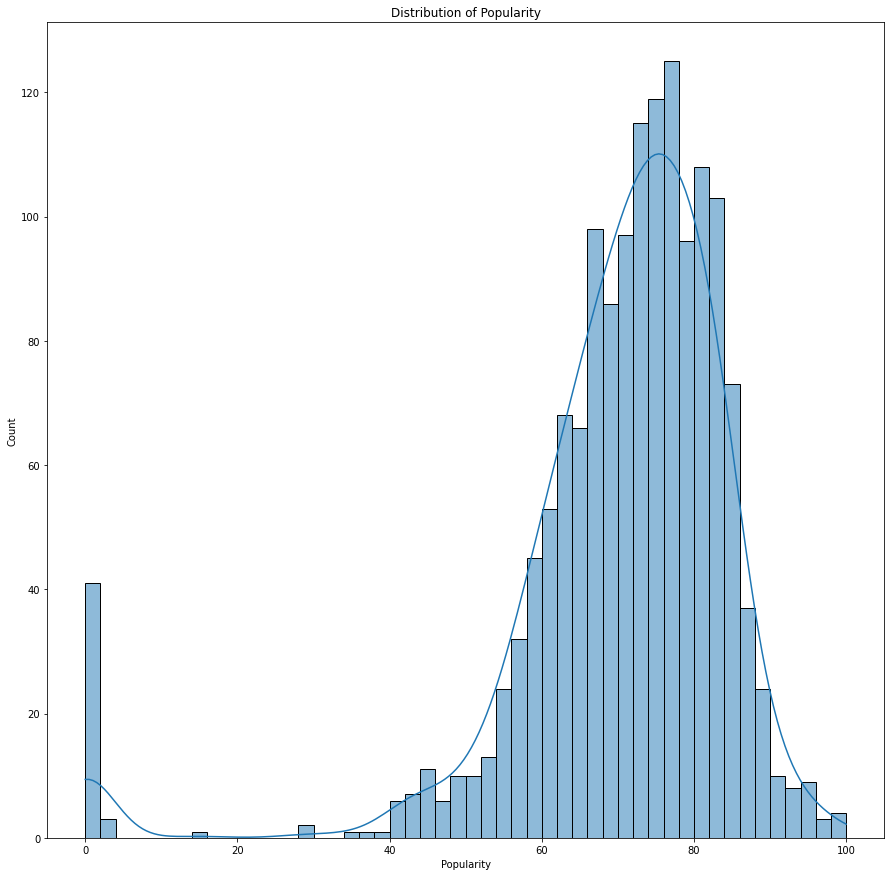

In [ ]:
#using a histogram to evaluate the use of the 1 to 100 scale for popularity.
fig = plt.figure(figsize=(15,15))
sns.histplot(data_clean['Popularity'].sort_values(),kde=True,bins=50)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.show()

It looks like everything `<30` doesn't really belong.




In [ ]:
small_pop_mask=data_clean["Popularity"]<=30

data_clean[small_pop_mask]

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
65,Don't Start Now,Dua Lipa,1250353,[],2021-08-13,0,0.793,0.793,-4.521,0.0830,0.01230,0.0951,123.950,183290.0,0.679,B
83,Love Again,Dua Lipa,1250353,[],2021-08-13,0,0.659,0.667,-4.668,0.0339,0.00173,0.1000,115.982,258004.0,0.468,B
95,In Da Getto,"J Balvin, Skrillex",1250353,[],2021-08-12,2,0.915,0.720,-3.126,0.0459,0.02500,0.0942,126.986,131067.0,0.631,G#/Ab
118,Hold On,Justin Bieber,1250353,[],2021-08-13,0,0.658,0.634,-5.797,0.0413,0.01060,0.1320,139.980,170813.0,0.290,C#/Db
156,Ramenez la coupe à la maison,Vegedream,1250353,[],2021-08-13,0,0.808,0.660,-6.237,0.0395,0.03580,0.1380,107.994,235556.0,0.804,C
164,bad guy,Billie Eilish,1250353,[],2021-08-13,0,0.701,0.425,-10.965,0.3750,0.32800,0.1000,135.128,194088.0,0.562,G
215,Lost Cause,Billie Eilish,1250353,[],2021-08-12,0,0.671,0.336,-8.494,0.2410,0.70500,0.0577,75.051,212496.0,0.518,A#/Bb
285,Anyone,Justin Bieber,1250353,[],2021-08-13,0,0.686,0.538,-8.026,0.0345,0.18100,0.1130,115.884,190779.0,0.584,D
308,Therefore I Am,Billie Eilish,1250353,[],2021-08-13,0,0.889,0.340,-7.773,0.0697,0.21800,0.0550,94.009,174321.0,0.716,B
311,Higher Power,Coldplay,1250353,[],2021-08-13,0,0.507,0.828,-6.023,0.0449,0.00711,0.2610,178.032,211295.0,0.489,A#/Bb


Looks like I found a correlation between this and the empty `Genre` fields. 

In [ ]:
data_clean['Genre']

0                  ['indie rock italiano', 'italian pop']
1                                  ['australian hip hop']
2                                                 ['pop']
3                                       ['pop', 'uk pop']
4                           ['lgbtq+ hip hop', 'pop rap']
                              ...                        
1551                       ['dance pop', 'pop', 'uk pop']
1552             ['sertanejo', 'sertanejo universitario']
1553    ['dance pop', 'electropop', 'pop', 'post-teen ...
1554                       ['brega funk', 'funk carioca']
1555                             ['pop', 'post-teen pop']
Name: Genre, Length: 1516, dtype: object

we have square brackets and apostrophes included in the data strings 

In [ ]:
#Seperate loops to strip and replace, respectively, the clutter in the data.
genre_clean=[]
for i in data_clean['Genre']:
  genre_clean.append(i.strip('[').strip(']'))

genre_clean1=[]
for i in genre_clean:
  genre_clean1.append(re.sub(r"'","", i))
genre_clean1

['indie rock italiano, italian pop',
 'australian hip hop',
 'pop',
 'pop, uk pop',
 'lgbtq+ hip hop, pop rap',
 'lgbtq+ hip hop, pop rap',
 'dance pop, pop',
 'puerto rican pop, trap latino',
 'latin, reggaeton, trap latino',
 'indie rock italiano, italian pop',
 'dance pop, pop, uk pop',
 'latin, reggaeton, reggaeton colombiano',
 'k-pop, k-pop boy group',
 'canadian pop, pop, post-teen pop',
 'k-pop, k-pop boy group',
 'pop',
 'pop',
 'canadian contemporary r&b, canadian pop, pop',
 'latin, reggaeton, trap latino',
 'dance pop, pop',
 'reggaeton, trap latino',
 'dance pop, pop',
 'pop',
 'gauze pop, indietronica, shiver pop',
 'canadian contemporary r&b, canadian pop, pop',
 'pop',
 'latin, latin hip hop, reggaeton, trap latino',
 'dfw rap, melodic rap, rap',
 'dance pop, house, pop dance, tropical house, uk dance',
 'australian hip hop',
 'dance pop, pop, post-teen pop',
 'dance pop, electropop, pop, post-teen pop',
 'pop',
 'colombian pop, latin, reggaeton, reggaeton colombiano',


In [ ]:
#Updating Genre with the cleaned up strings. 
genre_dict={'Genre':genre_clean1}
data_clean['Genre']=pd.DataFrame(genre_dict, index=data_clean.index)

data_clean

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Beggin',Måneskin,3377762,"indie rock italiano, italian pop",2017-12-08,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B
1,STAY (with Justin Bieber),The Kid LAROI,2230022,australian hip hop,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db
2,good 4 u,Olivia Rodrigo,6266514,pop,2021-05-21,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A
3,Bad Habits,Ed Sheeran,83293380,"pop, uk pop",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,"lgbtq+ hip hop, pop rap",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,"dance pop, pop, uk pop",2017-06-02,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,"sertanejo, sertanejo universitario",2019-10-11,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B
1553,Havana (feat. Young Thug),Camila Cabello,22698747,"dance pop, electropop, pop, post-teen pop",2018-01-12,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,"brega funk, funk carioca",2019-09-25,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F


In [ ]:
#Droping the rows with an empty genre
genre_mask=data_clean['Genre']==''
data_clean.drop(data_clean[genre_mask].index, inplace=True)

In [ ]:
data_clean

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Beggin',Måneskin,3377762,"indie rock italiano, italian pop",2017-12-08,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B
1,STAY (with Justin Bieber),The Kid LAROI,2230022,australian hip hop,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db
2,good 4 u,Olivia Rodrigo,6266514,pop,2021-05-21,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A
3,Bad Habits,Ed Sheeran,83293380,"pop, uk pop",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,"lgbtq+ hip hop, pop rap",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,"dance pop, pop, uk pop",2017-06-02,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,"sertanejo, sertanejo universitario",2019-10-11,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B
1553,Havana (feat. Young Thug),Camila Cabello,22698747,"dance pop, electropop, pop, post-teen pop",2018-01-12,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,"brega funk, funk carioca",2019-09-25,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F


In [ ]:
#Checking to see if anything else odd is happening in genre now that it is clean.
print(sorted(data_clean['Genre'].unique())[:10])
print(sorted(data_clean['Genre'].unique())[-10:])

['a cappella', 'acoustic pop, neo mellow, pop, pop rock', 'adult standards, american folk revival', 'adult standards, brill building pop, easy listening, lounge, mellow gold, vocal jazz', 'adult standards, brill building pop, easy listening, lounge, rockabilly, vocal jazz', 'adult standards, brill building pop, easy listening, lounge, vocal jazz', 'adult standards, canadian pop, jazz pop, lounge', 'adult standards, easy listening, lounge', 'adult standards, easy listening, lounge, swing, vocal jazz', 'adult standards, easy listening, lounge, vocal jazz']
['trap argentino, trap latino, trap triste', 'trap chileno, trap latino', 'trap latino', 'trap queen', 'tropical house', 'uk hip hop', 'urbano espanol', 'venezuelan hip hop', 'viral rap', 'weirdcore']


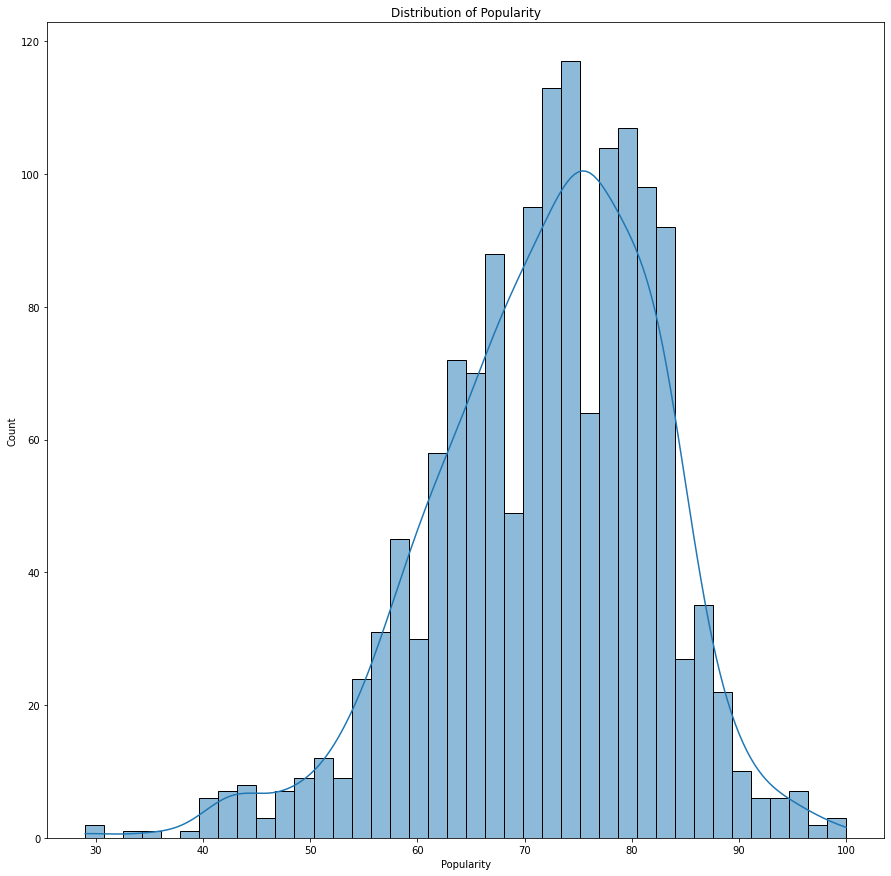

In [ ]:
#Rerunning the same popularity histogram to see if dropping the bad genre's fixed the issues in popularity
fig = plt.figure(figsize=(15,15))
sns.histplot(data_clean['Popularity'].sort_values(),kde=True,bins=40)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.show()

It did :)

### Encoding

####Genre
This variable has a lot of overlapping information in these strings. It also has a lot of potential features in it if we fully encode it. However, that could be something that would really bog down the analysis and out us at risk to over-fitting. 

In [ ]:
data_clean['Genre']

0                indie rock italiano, italian pop
1                              australian hip hop
2                                             pop
3                                     pop, uk pop
4                         lgbtq+ hip hop, pop rap
                          ...                    
1551                       dance pop, pop, uk pop
1552           sertanejo, sertanejo universitario
1553    dance pop, electropop, pop, post-teen pop
1554                     brega funk, funk carioca
1555                           pop, post-teen pop
Name: Genre, Length: 1441, dtype: object

In [ ]:
#Generating a list of Genre
splitvar=[]
for i in data_clean['Genre']:
  splitvar.append(i.split(', '))
print(splitvar)
print(data_clean['Genre'][:20])

[['indie rock italiano', 'italian pop'], ['australian hip hop'], ['pop'], ['pop', 'uk pop'], ['lgbtq+ hip hop', 'pop rap'], ['lgbtq+ hip hop', 'pop rap'], ['dance pop', 'pop'], ['puerto rican pop', 'trap latino'], ['latin', 'reggaeton', 'trap latino'], ['indie rock italiano', 'italian pop'], ['dance pop', 'pop', 'uk pop'], ['latin', 'reggaeton', 'reggaeton colombiano'], ['k-pop', 'k-pop boy group'], ['canadian pop', 'pop', 'post-teen pop'], ['k-pop', 'k-pop boy group'], ['pop'], ['pop'], ['canadian contemporary r&b', 'canadian pop', 'pop'], ['latin', 'reggaeton', 'trap latino'], ['dance pop', 'pop'], ['reggaeton', 'trap latino'], ['dance pop', 'pop'], ['pop'], ['gauze pop', 'indietronica', 'shiver pop'], ['canadian contemporary r&b', 'canadian pop', 'pop'], ['pop'], ['latin', 'latin hip hop', 'reggaeton', 'trap latino'], ['dfw rap', 'melodic rap', 'rap'], ['dance pop', 'house', 'pop dance', 'tropical house', 'uk dance'], ['australian hip hop'], ['dance pop', 'pop', 'post-teen pop'], ['

In [ ]:
#Splitting Genre into each individual element
splitvar2=[]
for i in splitvar:
  for j in i:
    splitvar2.append(j)
splitvar2

['indie rock italiano',
 'italian pop',
 'australian hip hop',
 'pop',
 'pop',
 'uk pop',
 'lgbtq+ hip hop',
 'pop rap',
 'lgbtq+ hip hop',
 'pop rap',
 'dance pop',
 'pop',
 'puerto rican pop',
 'trap latino',
 'latin',
 'reggaeton',
 'trap latino',
 'indie rock italiano',
 'italian pop',
 'dance pop',
 'pop',
 'uk pop',
 'latin',
 'reggaeton',
 'reggaeton colombiano',
 'k-pop',
 'k-pop boy group',
 'canadian pop',
 'pop',
 'post-teen pop',
 'k-pop',
 'k-pop boy group',
 'pop',
 'pop',
 'canadian contemporary r&b',
 'canadian pop',
 'pop',
 'latin',
 'reggaeton',
 'trap latino',
 'dance pop',
 'pop',
 'reggaeton',
 'trap latino',
 'dance pop',
 'pop',
 'pop',
 'gauze pop',
 'indietronica',
 'shiver pop',
 'canadian contemporary r&b',
 'canadian pop',
 'pop',
 'pop',
 'latin',
 'latin hip hop',
 'reggaeton',
 'trap latino',
 'dfw rap',
 'melodic rap',
 'rap',
 'dance pop',
 'house',
 'pop dance',
 'tropical house',
 'uk dance',
 'australian hip hop',
 'dance pop',
 'pop',
 'post-teen p

In [ ]:
#Creating a new dataframe of the individual elements to feature count.
splitdf=pd.DataFrame({ 'Genres' : splitvar2})
splitdf.value_counts()

Genres             
pop                    478
rap                    302
dance pop              254
post-teen pop          252
pop rap                160
                      ... 
perreo                   1
funk 150 bpm             1
pacific islands pop      1
oulu metal               1
a cappella               1
Length: 334, dtype: int64

Important note: There are 334 different genres that could potentially be used in this analysis. 

In [ ]:
#Creating a dataframe that is an ordered list of the most frequent genres. 
splitdfvalue=pd.DataFrame(splitdf.value_counts())
splitdfvalue

,0
Genres,
pop,478
rap,302
dance pop,254
post-teen pop,252
pop rap,160
...,...
perreo,1
funk 150 bpm,1
pacific islands pop,1


In [ ]:
#Creating a workable list from the ordered dataframe and cleaning it up to use as a filter.
#Functions a index slice that I can edit later on if I want to see if adding or removing faetures improves the model.
topgenre=[]
for i in splitdfvalue.index:
  topgenre.append(str(i).strip('(').strip(')').strip("'").strip(",").rstrip("'"))
top150=topgenre[:51]

#Creating a list that replaces multi-varible genre's with the most popular feature in the genre feild based on the total number of features captured in the "top150" list above. 
#Returning the number of rows that ended up without any genre that lined up with the top150 

toptest=[]
for i in splitvar:
  toptest.append(next((ele for ele in i if ele in top150), 'other'))
print('other' in toptest)
toptest.count('other')

True


174

Now I have a system where I can decided how much I want to trim the unique varibles in genre. Condense the multivariate genres to their most common variable, and allow me to evalute the amount of rows that would be lumped into an 'other' category.

I went with reducing genre by a little more than half and was left with 174 `other`'s



In [ ]:
data_clean['Genre']=pd.DataFrame({'Genre':toptest}, index=data_clean.index)
data_clean

,Song Name,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Beggin',Måneskin,3377762,other,2017-12-08,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B
1,STAY (with Justin Bieber),The Kid LAROI,2230022,other,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db
2,good 4 u,Olivia Rodrigo,6266514,pop,2021-05-21,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A
3,Bad Habits,Ed Sheeran,83293380,pop,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,pop rap,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,dance pop,2017-06-02,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,other,2019-10-11,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B
1553,Havana (feat. Young Thug),Camila Cabello,22698747,dance pop,2018-01-12,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,funk carioca,2019-09-25,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F


Now let's encode the 50 features we filtered.

In [ ]:
genre_dum=pd.get_dummies(data_clean, columns=['Genre'])
genre_dum

,Song Name,Artist,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Genre_adult standards,Genre_alt z,Genre_alternative r&b,Genre_atl hip hop,Genre_boy band,Genre_brooklyn drill,Genre_canadian contemporary r&b,Genre_canadian hip hop,Genre_canadian pop,Genre_chicago rap,Genre_colombian pop,Genre_conscious hip hop,Genre_dance pop,Genre_detroit hip hop,Genre_edm,Genre_electropop,Genre_funk carioca,Genre_german hip hop,Genre_hip hop,Genre_k-pop,Genre_k-pop girl group,Genre_latin,Genre_latin pop,Genre_melodic rap,Genre_modern rock,Genre_north carolina hip hop,Genre_ohio hip hop,Genre_other,Genre_pop,Genre_pop dance,Genre_pop rap,Genre_pop rock,Genre_puerto rican pop,Genre_r&b,Genre_rap,Genre_reggaeton,Genre_rock,Genre_slap house,Genre_trap latino,Genre_tropical house
0,Beggin',Måneskin,3377762,2017-12-08,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,STAY (with Justin Bieber),The Kid LAROI,2230022,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,good 4 u,Olivia Rodrigo,6266514,2021-05-21,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bad Habits,Ed Sheeran,83293380,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,2017-06-02,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,2019-10-11,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1553,Havana (feat. Young Thug),Camila Cabello,22698747,2018-01-12,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,2019-09-25,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


####Chords

We can one-hot encode chords as well. We can alsouse this to quickly check the values in chords since that hasn't been done yet. 

In [ ]:
chord_dum=pd.get_dummies(genre_dum, columns=['Chord'])
chord_dum

,Song Name,Artist,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Genre_adult standards,Genre_alt z,Genre_alternative r&b,Genre_atl hip hop,Genre_boy band,Genre_brooklyn drill,Genre_canadian contemporary r&b,Genre_canadian hip hop,Genre_canadian pop,Genre_chicago rap,Genre_colombian pop,Genre_conscious hip hop,Genre_dance pop,Genre_detroit hip hop,Genre_edm,Genre_electropop,Genre_funk carioca,Genre_german hip hop,Genre_hip hop,Genre_k-pop,Genre_k-pop girl group,Genre_latin,Genre_latin pop,Genre_melodic rap,Genre_modern rock,Genre_north carolina hip hop,Genre_ohio hip hop,Genre_other,Genre_pop,Genre_pop dance,Genre_pop rap,Genre_pop rock,Genre_puerto rican pop,Genre_r&b,Genre_rap,Genre_reggaeton,Genre_rock,Genre_slap house,Genre_trap latino,Genre_tropical house,Chord_A,Chord_A#/Bb,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab
0,Beggin',Måneskin,3377762,2017-12-08,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,STAY (with Justin Bieber),The Kid LAROI,2230022,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,good 4 u,Olivia Rodrigo,6266514,2021-05-21,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Bad Habits,Ed Sheeran,83293380,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,2017-06-02,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,2019-10-11,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1553,Havana (feat. Young Thug),Camila Cabello,22698747,2018-01-12,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,2019-09-25,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Looks good!

####Dates
The exact release day doesn't really give us much information by itself, but there are a ton of ways one could parse a date to try and see if there are any patterns. 

We could encode it as release month, week or day of the year. We could also  break it down to week/day of the month, or even day of the week. All could be valid choices and it would be interesting to see what patterns arise, seeing as how I already have a a decent number of features with

In [ ]:
#Converting the string in Release Date to datetime.month and weekday adding it to the end of the dataframe
chord_dum['Release Month'] = pd.DatetimeIndex(chord_dum['Release Date']).month
chord_dum['Release Weekday'] = pd.DatetimeIndex(chord_dum['Release Date']).dayofweek
chord_dum

,Song Name,Artist,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Genre_adult standards,Genre_alt z,Genre_alternative r&b,Genre_atl hip hop,Genre_boy band,Genre_brooklyn drill,Genre_canadian contemporary r&b,Genre_canadian hip hop,Genre_canadian pop,Genre_chicago rap,Genre_colombian pop,Genre_conscious hip hop,Genre_dance pop,Genre_detroit hip hop,Genre_edm,Genre_electropop,Genre_funk carioca,Genre_german hip hop,Genre_hip hop,Genre_k-pop,Genre_k-pop girl group,Genre_latin,Genre_latin pop,Genre_melodic rap,Genre_modern rock,Genre_north carolina hip hop,Genre_ohio hip hop,Genre_other,Genre_pop,Genre_pop dance,Genre_pop rap,Genre_pop rock,Genre_puerto rican pop,Genre_r&b,Genre_rap,Genre_reggaeton,Genre_rock,Genre_slap house,Genre_trap latino,Genre_tropical house,Chord_A,Chord_A#/Bb,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab,Release Month,Release Weekday
0,Beggin',Måneskin,3377762,2017-12-08,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12,4
1,STAY (with Justin Bieber),The Kid LAROI,2230022,2021-07-09,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,4
2,good 4 u,Olivia Rodrigo,6266514,2021-05-21,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,4
3,Bad Habits,Ed Sheeran,83293380,2021-06-25,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,4
4,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,5473565,2021-07-23,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,New Rules,Dua Lipa,27167675,2017-06-02,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,4
1552,Cheirosa - Ao Vivo,Jorge & Mateus,15019109,2019-10-11,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10,4
1553,Havana (feat. Young Thug),Camila Cabello,22698747,2018-01-12,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,4
1554,Surtada - Remix Brega Funk,"Dadá Boladão, Tati Zaqui, OIK",208630,2019-09-25,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,2


In [ ]:
#Dropping the last columns that are no longer useful or were not relevant and making another copy. 
chord_dum.drop(["Release Date", "Song Name", "Artist"], axis=1, inplace=True)
df=chord_dum.copy()
df

,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Genre_adult standards,Genre_alt z,Genre_alternative r&b,Genre_atl hip hop,Genre_boy band,Genre_brooklyn drill,Genre_canadian contemporary r&b,Genre_canadian hip hop,Genre_canadian pop,Genre_chicago rap,Genre_colombian pop,Genre_conscious hip hop,Genre_dance pop,Genre_detroit hip hop,Genre_edm,Genre_electropop,Genre_funk carioca,Genre_german hip hop,Genre_hip hop,Genre_k-pop,Genre_k-pop girl group,Genre_latin,Genre_latin pop,Genre_melodic rap,Genre_modern rock,Genre_north carolina hip hop,Genre_ohio hip hop,Genre_other,Genre_pop,Genre_pop dance,Genre_pop rap,Genre_pop rock,Genre_puerto rican pop,Genre_r&b,Genre_rap,Genre_reggaeton,Genre_rock,Genre_slap house,Genre_trap latino,Genre_tropical house,Chord_A,Chord_A#/Bb,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab,Release Month,Release Weekday
0,3377762,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12,4
1,2230022,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,4
2,6266514,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,4
3,83293380,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,4
4,5473565,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,27167675,79,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,4
1552,15019109,66,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10,4
1553,22698747,81,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,4
1554,208630,60,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 1555
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Artist Followers                 1441 non-null   int64  
 1   Popularity                       1441 non-null   int64  
 2   Danceability                     1441 non-null   float64
 3   Energy                           1441 non-null   float64
 4   Loudness                         1441 non-null   float64
 5   Speechiness                      1441 non-null   float64
 6   Acousticness                     1441 non-null   float64
 7   Liveness                         1441 non-null   float64
 8   Tempo                            1441 non-null   float64
 9   Duration (ms)                    1441 non-null   float64
 10  Valence                          1441 non-null   float64
 11  Genre_adult standards            1441 non-null   uint8  
 12  Genre_alt z         

###Figures

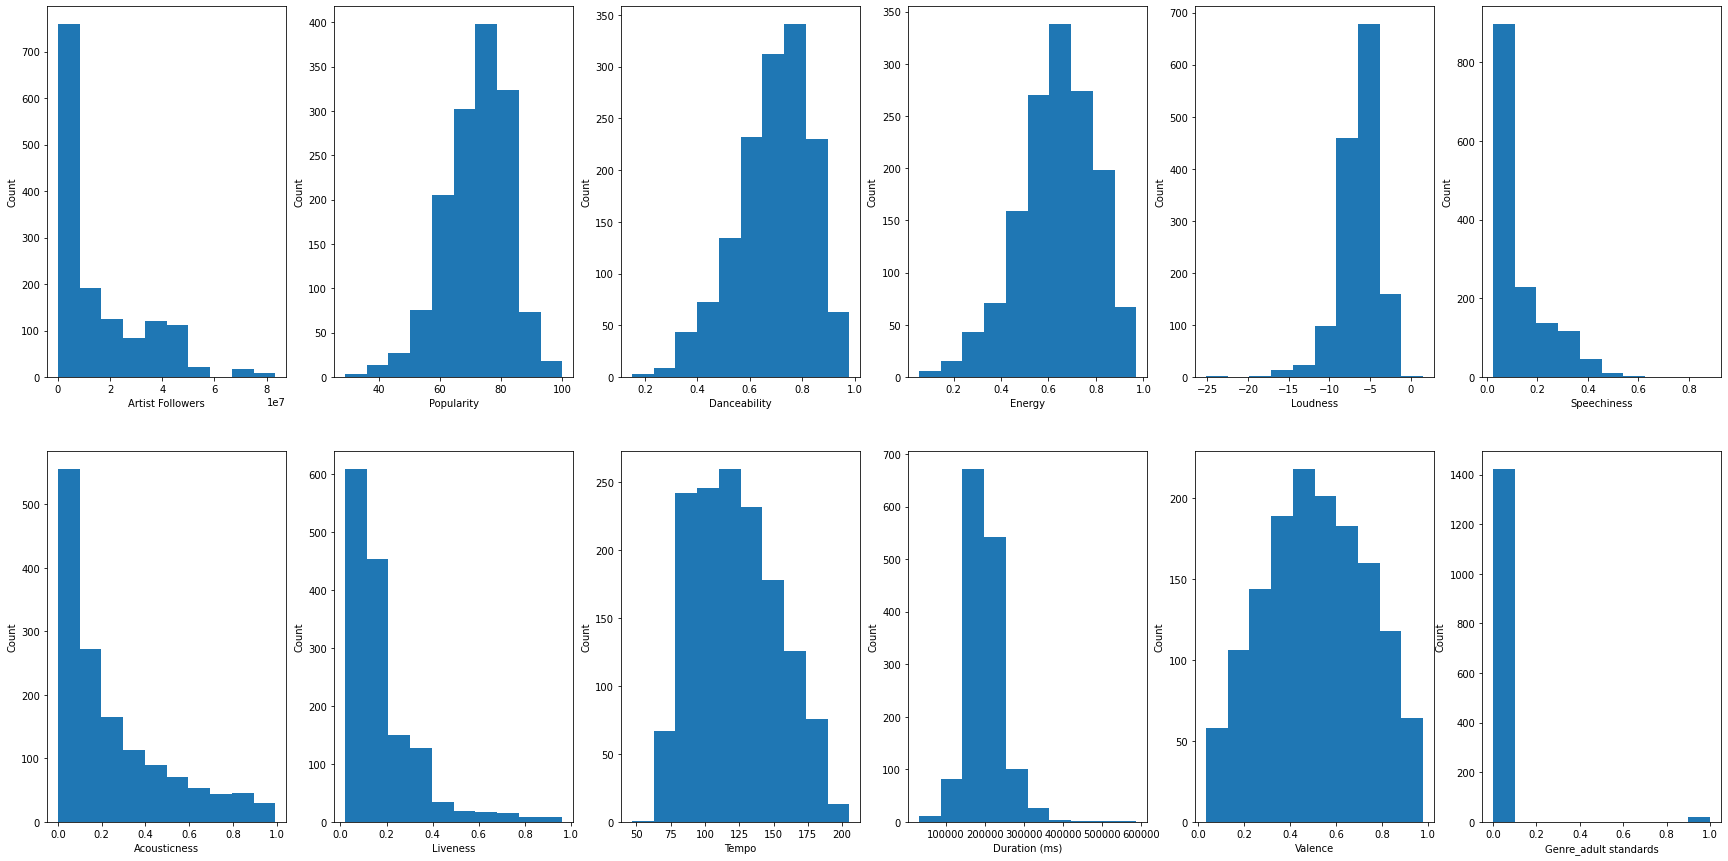

In [ ]:
#Evalute the distribution of continious variables. 
fig, axs = plt.subplots(2,6, figsize = (30,15)) 
column_names = df.columns
n = 0
for i in range(2): # Loop through rows 
  for j in range(6): # Loop through columns
    axs[i,j].hist(df[column_names[n]])
    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('Count')
    n = n + 1

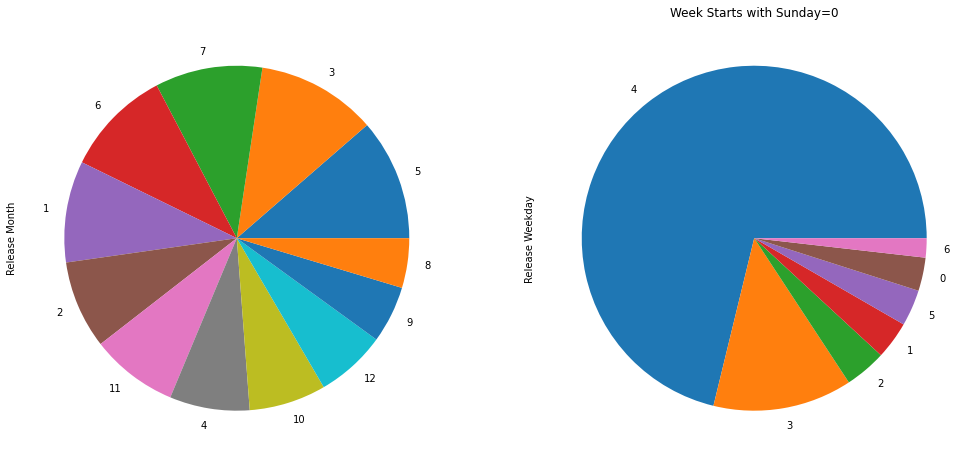

In [ ]:
# Show pie plots to observe value distribution
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (17,14))
plt.subplots_adjust(hspace=.25)

df['Release Month'].value_counts().plot.pie(ax=ax1)
df['Release Weekday'].value_counts().plot.pie(ax=ax2, title='Week Starts with Sunday=0')

In [ ]:
numerical_data = df.iloc[:, 0:11]
target = numerical_data['Popularity']
numerical_data.drop('Popularity', axis=1, inplace=True)
x_labels= list(numerical_data.columns)
numerical_data.head()

,Artist Followers,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,3377762,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589
1,2230022,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478
2,6266514,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688
3,83293380,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591
4,5473565,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894


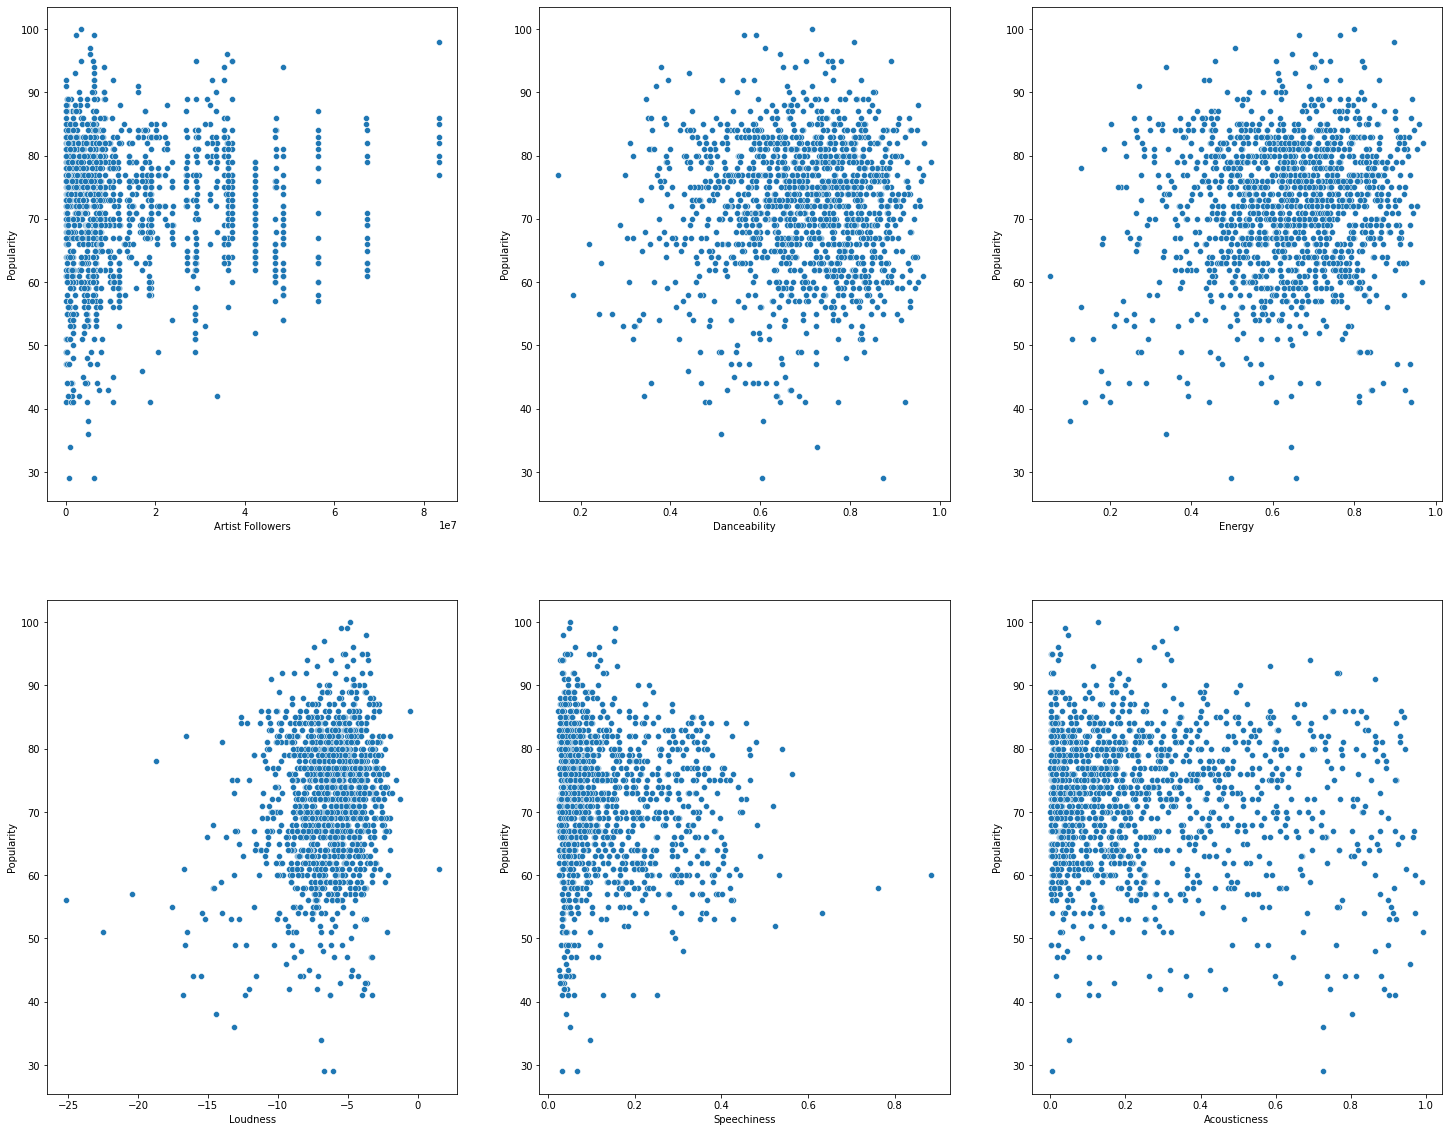

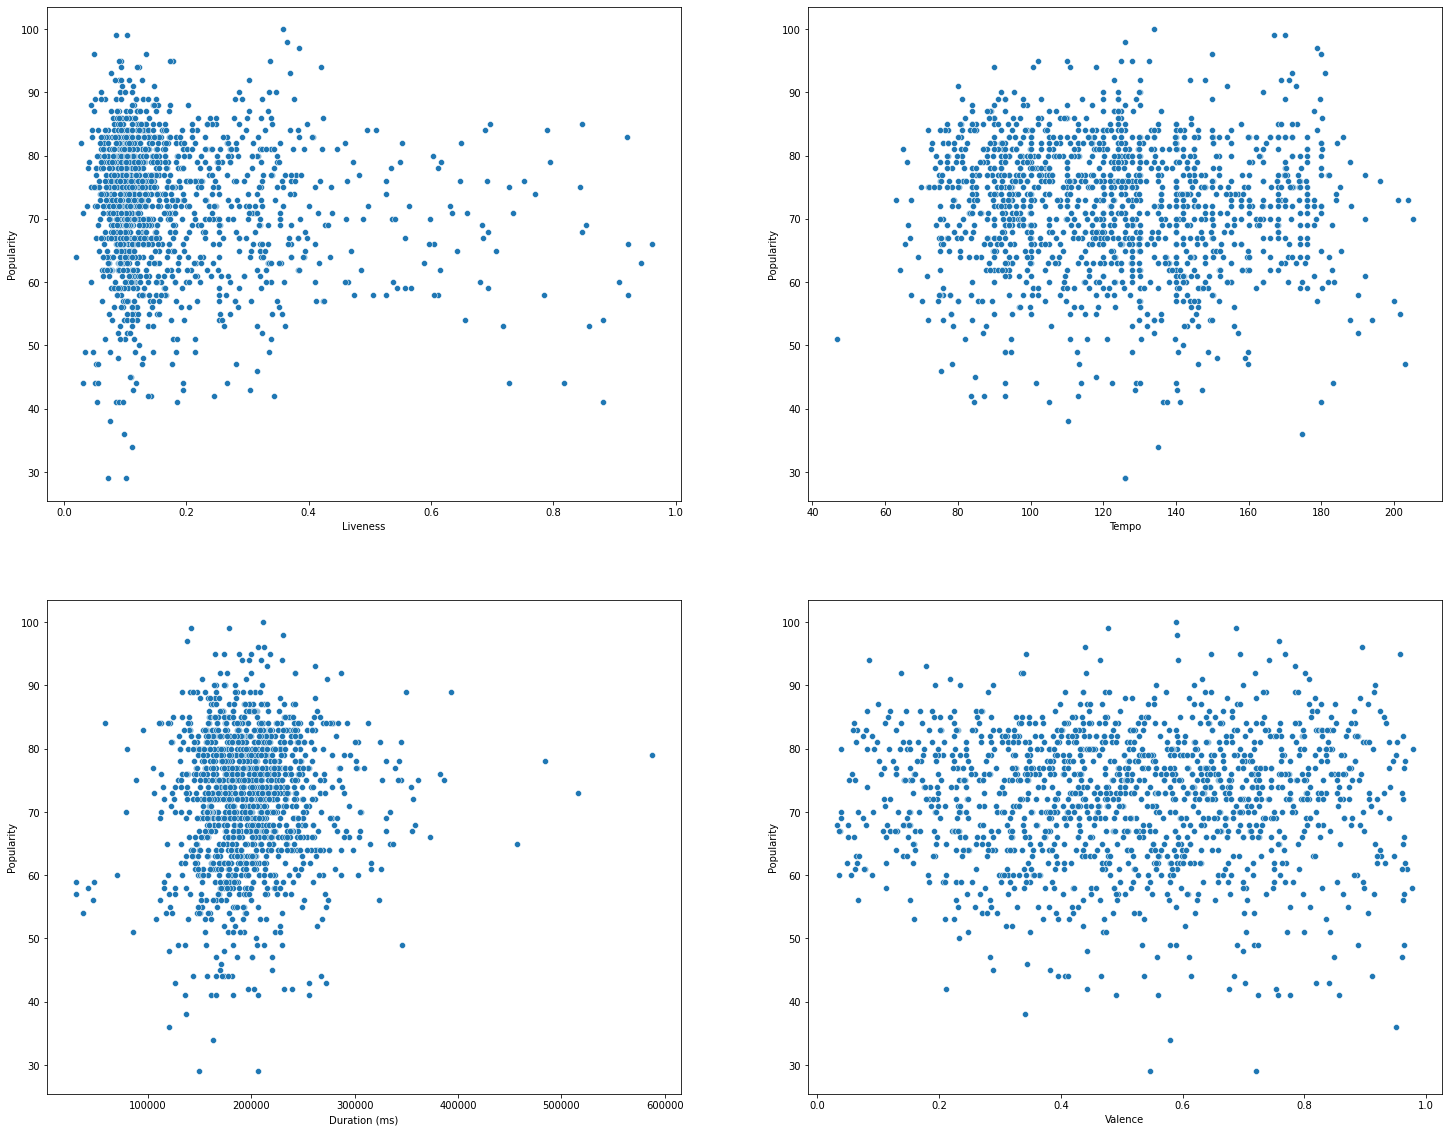

In [ ]:
counter = 0

fig, axs = plt.subplots(2, 3, figsize = (25, 20)) #set figure for subplots

for ii in range(2): #plot and label first  vars
  for jj in range(3):
    sns.scatterplot(x=numerical_data.iloc[:,counter], y = target, ax = axs[ii, jj])
    axs[ii, jj].set_xlabel(x_labels[counter])
    counter+=1


fig, axs2 = plt.subplots(2, 2, figsize = (25, 20)) #set figure for subplots

for ii in range(2): #plot and label first  vars
  for jj in range(2):
    sns.scatterplot(x=numerical_data.iloc[:,counter], y = target, ax = axs2[ii, jj])
    axs2[ii, jj].set_xlabel(x_labels[counter])
    counter+=1
    if counter>=10:
      break

## Processing

### Linear Regression

In [ ]:
X=df.drop(['Popularity'], axis = 1)
y=df['Popularity']

rms_error = np.zeros(500)

for ii in range(500):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = LinearRegression() 
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[ii] = np.sqrt(mean_squared_error(y_test, y_pred))

rms_error.mean()

9.3953630250252

Text(0, 0.5, 'Predicted Popularity')

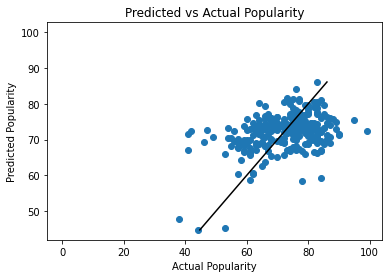

In [ ]:
myfit2 = LinearRegression().fit(X_train, y_train)

y_pred = myfit2.predict(X_test)
plt.plot([0,0],[100,100],'--', c='r')
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='black')
plt.title('Predicted vs Actual Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

Text(0.5, 1.0, 'Distribution of Residuals')

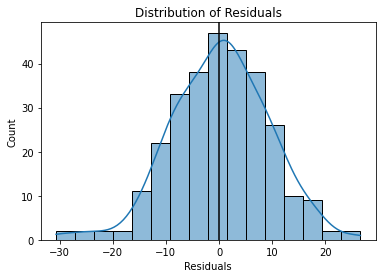

In [ ]:
linear_residuals = y_test-y_pred 
sns.histplot(linear_residuals, kde=True)
plt.axvline(0, 0, 90, c = 'k')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')


<function matplotlib.pyplot.show(*args, **kw)>

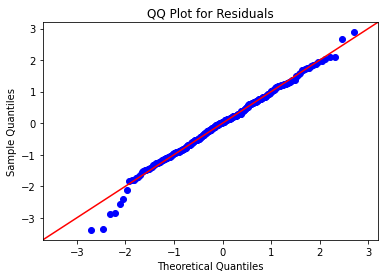

In [ ]:
sm.qqplot(linear_residuals, fit=True, line='45')
plt.title('QQ Plot for Residuals')
plt.show

### Decision Tree
Looks like we lose just a little bit of accuracy with the decesion tree

In [ ]:
X = df.drop('Popularity', axis = 1)
y = df['Popularity']

rms_error = np.zeros(500)

for ii in range(500):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=6) 
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[ii] = np.sqrt(mean_squared_error(y_test, y_pred))

rms_error.mean()

9.931792623933246

In [ ]:
# Number of iterations for cross validation
# Loop of 10 produces inconsistent results. 
# Anything over 50 produces optimal max depth between 2 and 4 - numbers are very close for all three.
num_loops = 200

# Try different max depth for each CV test.
max_depth = [1, 2, 3, 4, 5, 6, 7, 8]
rms_depth = np.zeros(len(max_depth))

for n, depth in enumerate(max_depth):
  # Storage for each result so we can get mean from all iterations.
  rmse_results = np.zeros(num_loops)
  for idx in range(0,num_loops):
    # Create train and test data sets.
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    # Configure model
    model_dt = DecisionTreeRegressor(max_depth=depth, random_state=0) 
    model_dt.fit(X_train,y_train)
    y_pred_dt = model_dt.predict(X_test)
    rmse_results[idx] = np.sqrt(mean_squared_error(y_test, y_pred_dt))

  # Record RMSE by depth to find optimal depth
  rms_depth[n] = rmse_results.mean().round(3)

# Print result so we can see which depth provided best RMSE
print(f"CV RMSE by Depth:\n")
for n, depth in enumerate(max_depth):
  print(f'Depth={max_depth[n]} | RMSE={rms_depth[n]}')
  if rms_depth[n] == rms_depth.min():
    optimal_depth = max_depth[n]
    optimal_rmse = rms_depth[n]
    print(f'Optimal Depth={optimal_depth}')

CV RMSE by Depth:

Depth=1 | RMSE=9.964
Depth=2 | RMSE=9.723
Optimal Depth=2
Depth=3 | RMSE=9.819
Depth=4 | RMSE=9.77
Depth=5 | RMSE=9.902
Depth=6 | RMSE=9.959
Depth=7 | RMSE=10.065
Depth=8 | RMSE=10.148


In [ ]:
max_depths = [3,4,5,6,7,8,9,10]

rms_depth = np.zeros(len(max_depths))

for n, depth in enumerate(max_depths): 
  rms_error = np.zeros(500)

  for idx in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    model = DecisionTreeRegressor(max_depth=depth) 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

  rms_depth[n] = rms_error.mean()

Text(0.5, 1.0, 'RMSE vs Max Depth')

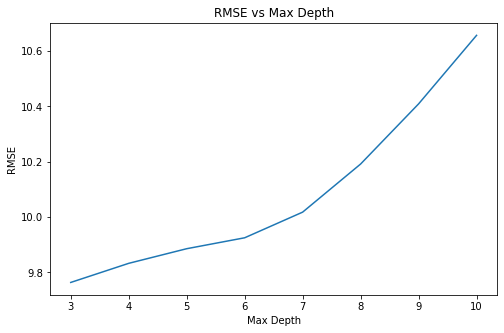

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('RMSE vs Max Depth')

In [ ]:
for ii in range(500):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = DecisionTreeRegressor(max_depth=3) 
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[ii] = np.sqrt(mean_squared_error(y_test, y_pred))

rms_error.mean()

9.788591272752177

Text(0.5, 1.0, 'Distribution of Residuals')

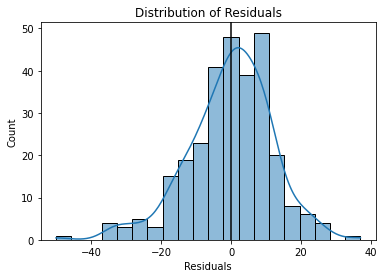

In [ ]:
dtree_residuals = y_test-y_pred 
sns.histplot(dtree_residuals, kde=True)
plt.axvline(0, 0, 90, c = 'k')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

Text(0.5, 1.0, 'Tree Diagram')

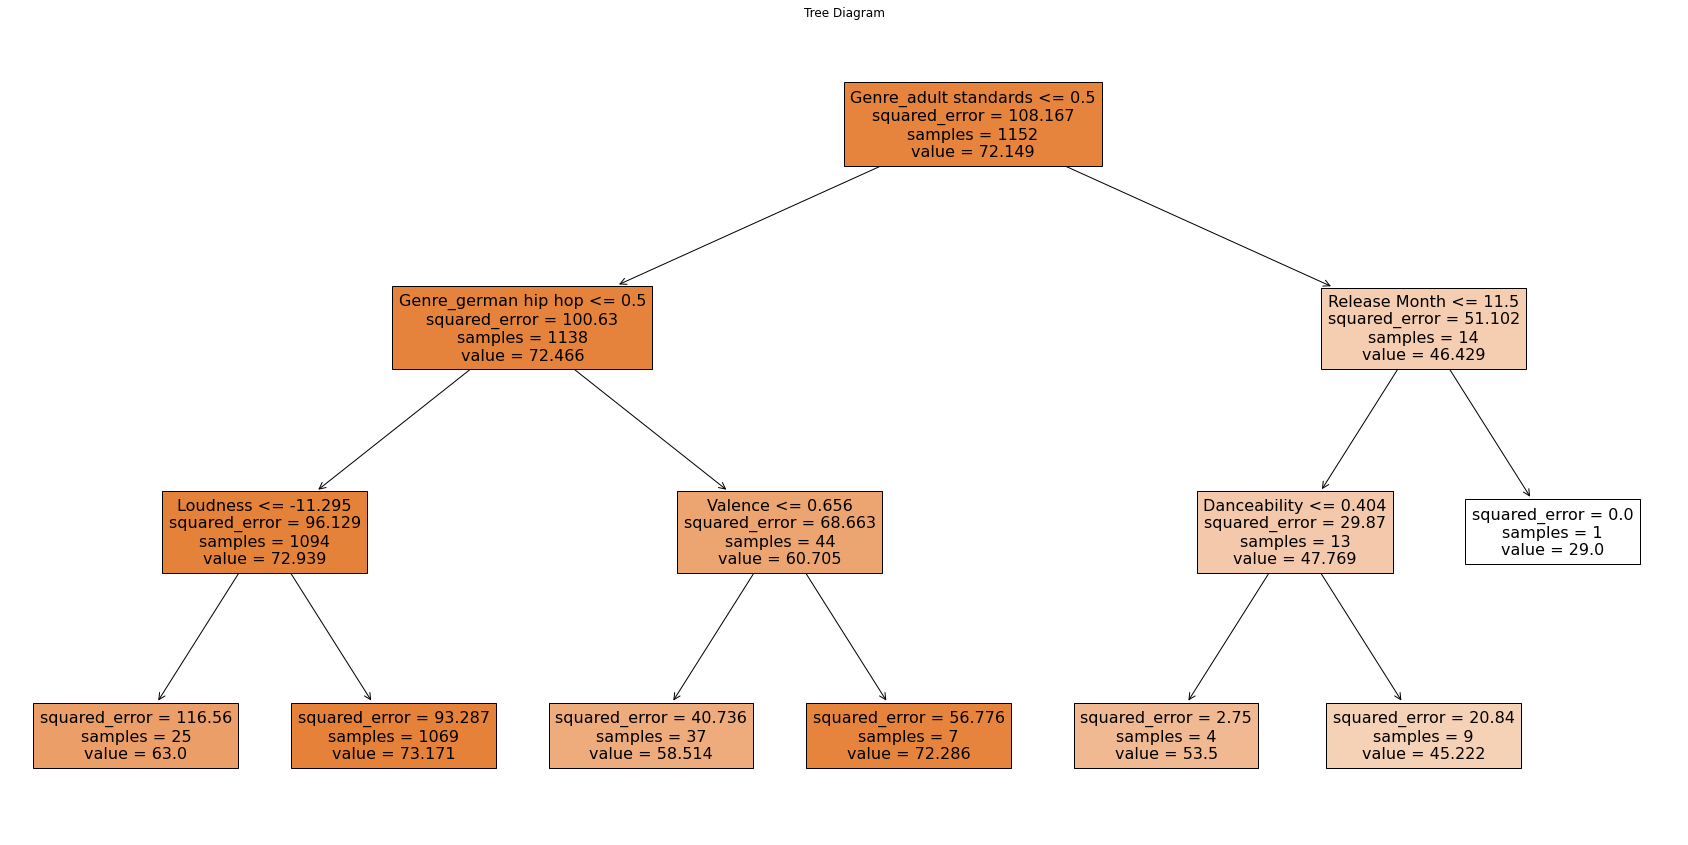

In [ ]:
plt.figure(figsize=(30,15))
tree_plot = tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.title('Tree Diagram')

###Random Forest
The decesion Tree doesn't look that great at all. It has higher error, and gains error quickly as depth is added. Let's see if a random forest and some feature detection can help.

In [ ]:
n=500

for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  model = RandomForestRegressor(max_depth=6, bootstrap=True)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

rms_error.mean()



9.411396178742097

Text(0.5, 1.0, 'Distribution of Residuals')

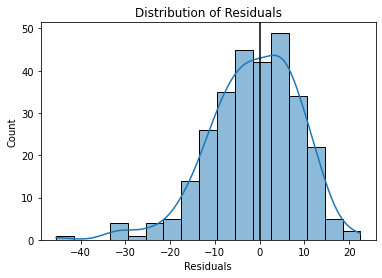

In [ ]:
rforest_residuals = y_test-y_pred 
sns.histplot(rforest_residuals, kde=True)
plt.axvline(0, 0, 90, c = 'k')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')


In [ ]:
df_dict_rforest = {'Features':X.columns, 'Weights': model.feature_importances_}

feature_weights = pd.DataFrame(df_dict_rforest)
feature_weights
pd.set_option('display.max_rows', None)

featuresdf = feature_weights[feature_weights['Weights'] != 0].sort_values('Weights', ascending=False)


Text(0, 0.5, 'Feature Importance Score')

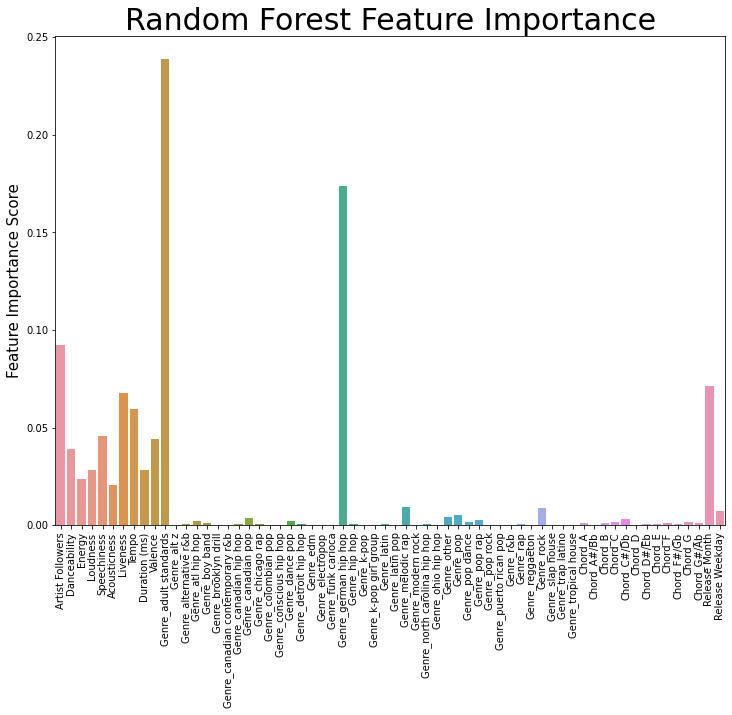

In [ ]:
# Importance scores for Features for Random Forest
importances = model.feature_importances_
rf_imp = pd.Series(importances, index = X.columns)
plt.figure(figsize = (12,9))
ax = sns.barplot(x = rf_imp.index, y = rf_imp.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('Random Forest Feature Importance', size = 30)
plt.ylabel('Feature Importance Score', size = 15)



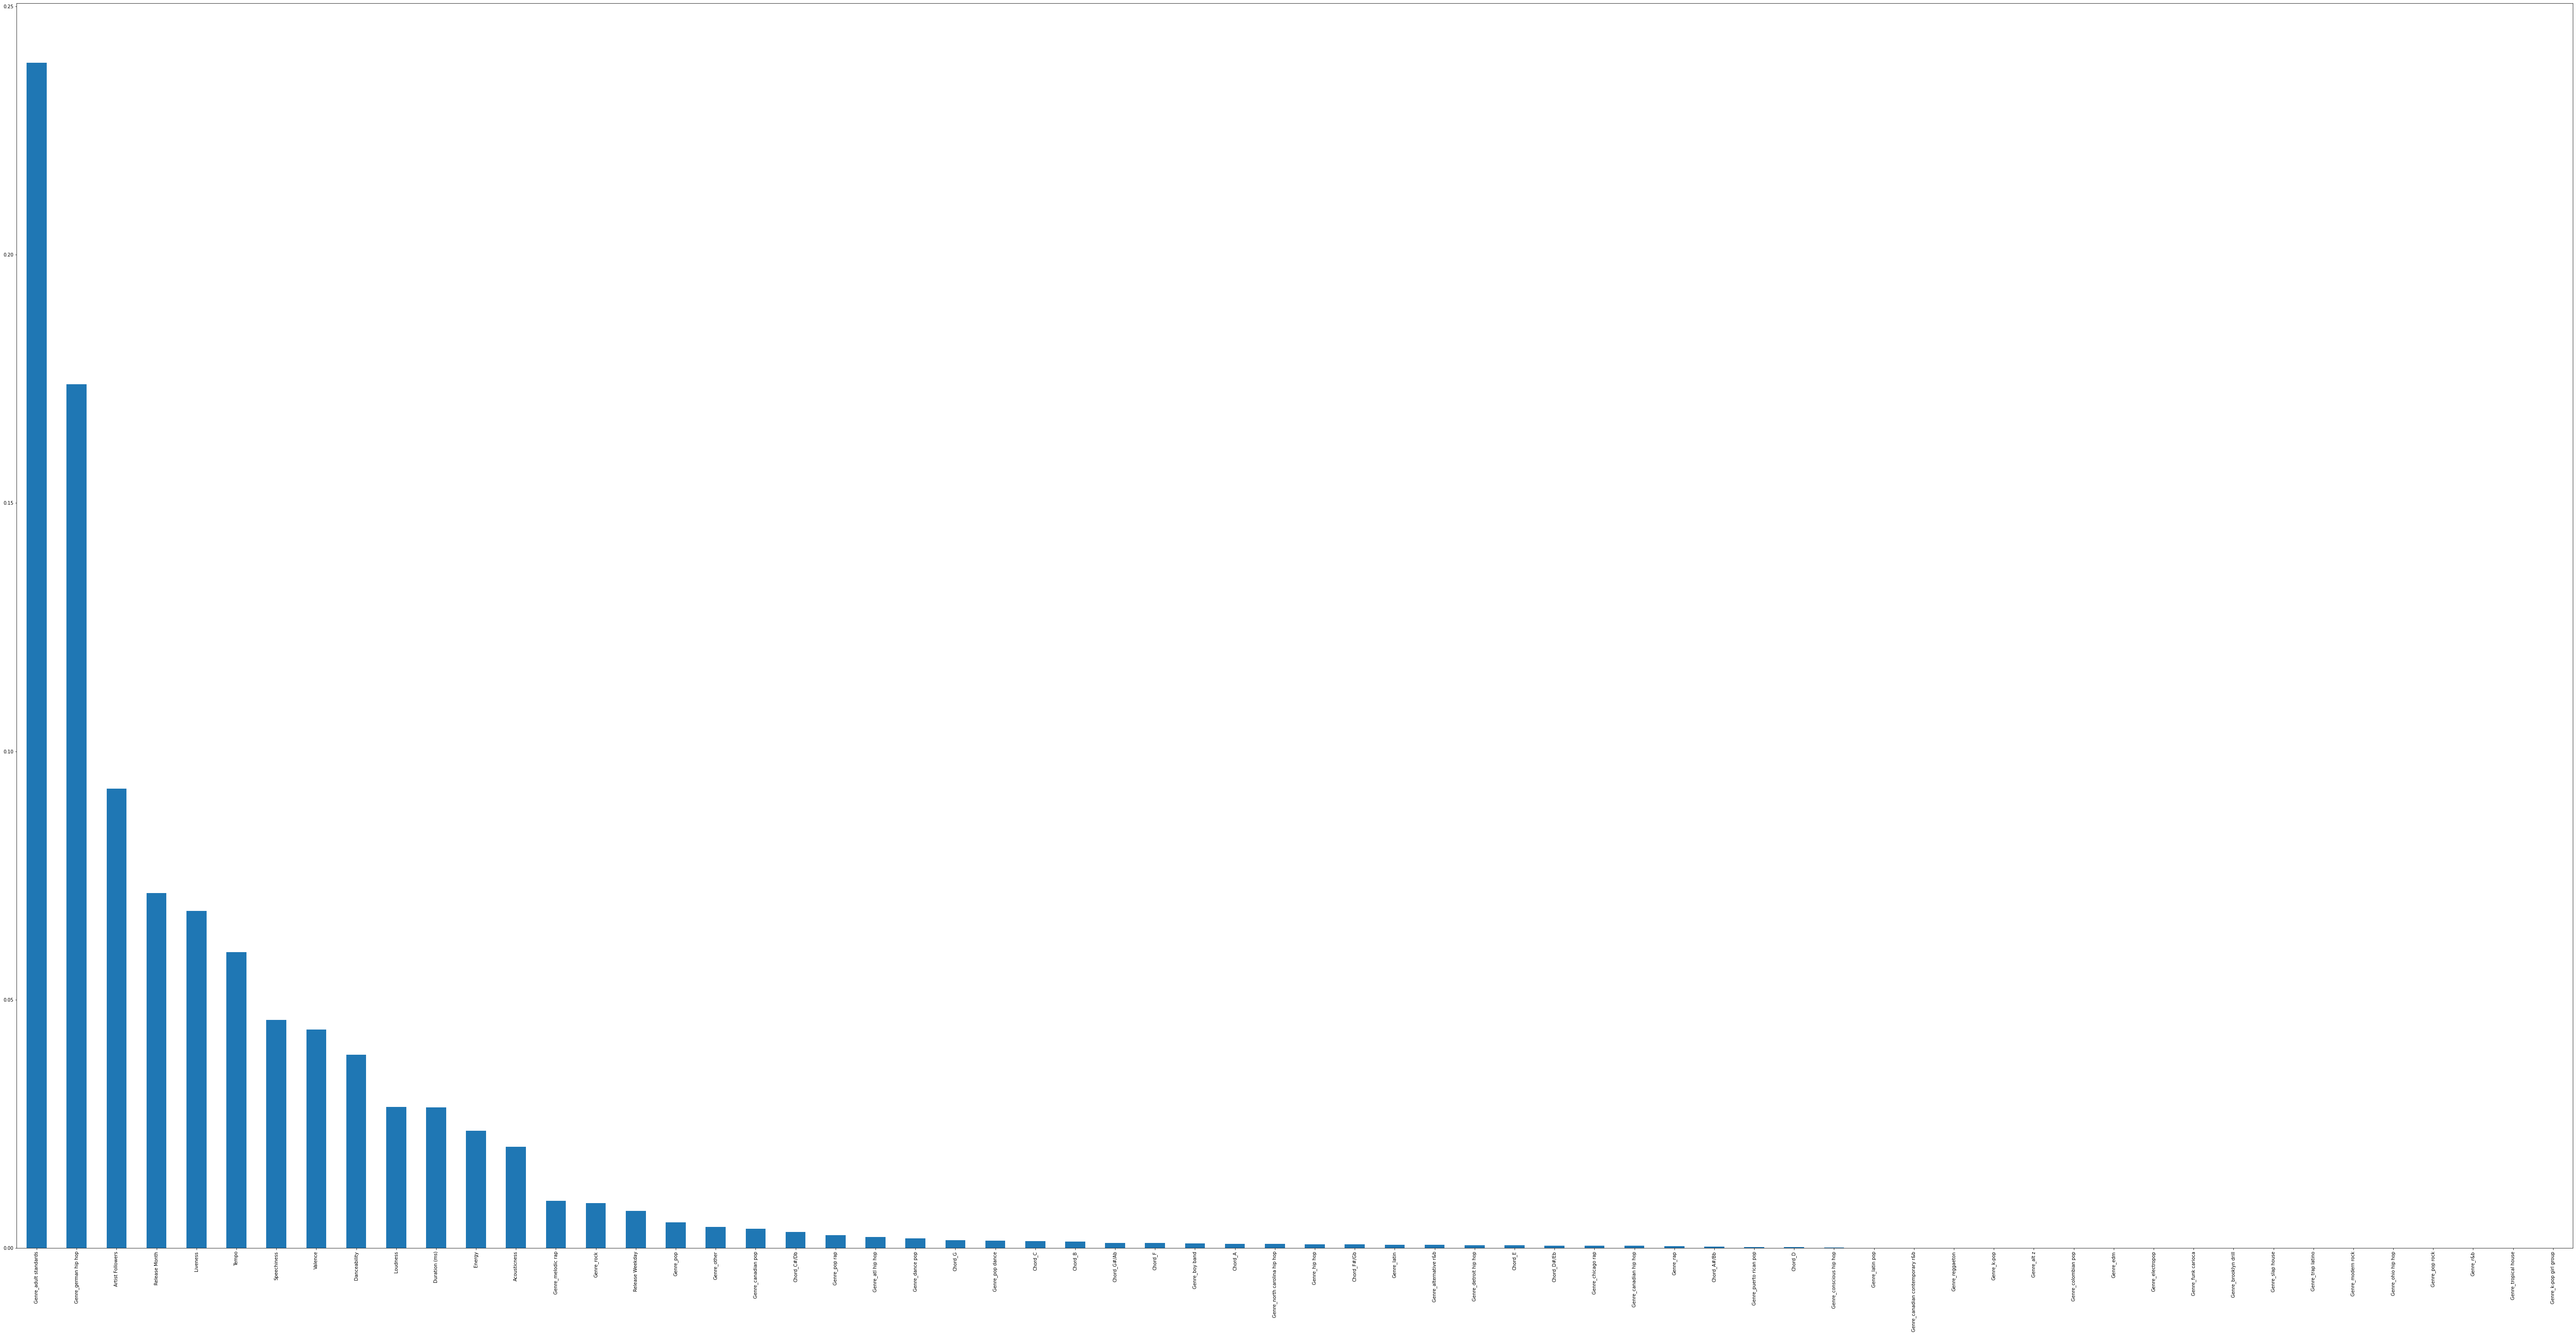

In [ ]:
rf_imp.sort_values(ascending = False).plot(kind = 'bar', figsize = (100,50))

###XGBoost
The Random Forest did help improve the error, but it is still around where the linear regression is. Next we will try XGBoost.

In [ ]:
n=500
rmse=np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
  xgbr = xgb.XGBRegressor(objective='reg:squarederror', verbosity=0, seed=10)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  rmse[idx] = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

rmse.mean()

9.21761245053147

Text(0.5, 1.0, 'Distribution of Residuals')

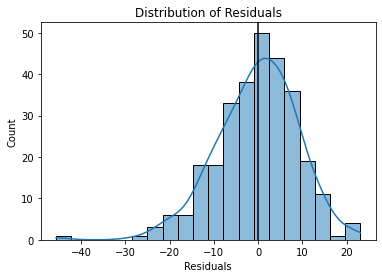

In [ ]:
xgb_residuals = y_test-y_pred_xgb 
sns.histplot(xgb_residuals, kde=True)
plt.axvline(0, 0, 90, c = 'k')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')


In [ ]:
param_test = {
 'max_depth':[3,4,5,6,7],
 'learning_rate' : [0.1, 0.2, 0.3, 0.4], 
 'n_estimators': [20,40,60,80,100,120,140],
}

gsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror', seed = 10), 
param_grid = param_test, scoring='neg_mean_squared_error', cv=5)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
model = gsearch.fit(X_train,y_train)

print(model.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


In [ ]:
n=500
rmse=np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
  xgbr = xgb.XGBRegressor(objective='reg:squarederror', verbosity=0, seed=10, learning_rate=.1, max_depth=6, n_estimators=140)
  xgbr.fit(X_train,y_train)
  y_pred_xgb = xgbr.predict(X_test)
  rmse[idx] = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

rmse.mean()

9.2372370319734

Text(0.5, 1.0, 'Distribution of Residuals')

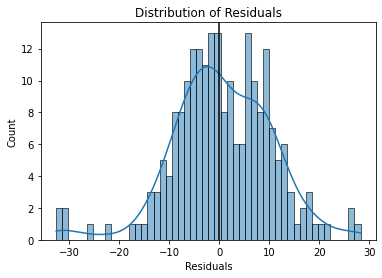

In [ ]:
xgb2_residuals = y_test-y_pred_xgb 
sns.histplot(xgb2_residuals, kde=True, bins=50)
plt.axvline(0, 0, 90, c = 'k')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')


In [ ]:
df_dict = {'Features':X.columns, 'Weights': xgbr.feature_importances_}

feature_weights_xgb = pd.DataFrame(df_dict)
feature_weights_xgb
pd.set_option('display.max_rows', None)

featuresdf = feature_weights_xgb[feature_weights_xgb['Weights'] != 0].sort_values('Weights', ascending=False)
print(featuresdf.describe())
featuresdf

         Weights
count  54.000000
mean    0.018519
std     0.039504
min     0.001595
25%     0.008415
50%     0.011144
75%     0.016005
max     0.297912


,Features,Weights
10,Genre_adult standards,0.297912
27,Genre_german hip hop,0.040199
38,Genre_pop,0.035328
17,Genre_canadian hip hop,0.034877
15,Genre_brooklyn drill,0.026361
33,Genre_melodic rap,0.024468
28,Genre_hip hop,0.023939
13,Genre_atl hip hop,0.022149
12,Genre_alternative r&b,0.018872
29,Genre_k-pop,0.017846


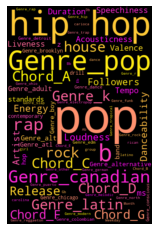

In [ ]:
wordcloud_rforest = WordCloud(colormap='spring', height=600)
text = feature_weights['Features'].to_string()
wordcloud_rforest.generate(text)

plt.imshow(wordcloud_rforest, interpolation='bilinear')
plt.axis("off")
plt.show()


##Conclusion

The models are somewhat accurate at predicting popularity with a RMSE of about 9. On a scale of 100 that is still a fair bit of variability. An important component to this analysis is the feature detection. Determining which variables have the greatest impact and how those variables were constructed. In my case, a couple of genres and the release month is the most impactful which were all generated during EDA and cleaning. 